# Imbalanced Learning

In [370]:
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from collections import Counter
from collections import defaultdict

### Chech imbalanced variables

In [371]:
df = pd.read_csv('imbd_log.csv')

In [372]:
df.dtypes

originalTitle          object
rating                 object
startYear               int64
runtimeMinutes        float64
awardWins             float64
numVotes              float64
totalImages           float64
totalVideos           float64
totalCredits            int64
criticReviewsTotal    float64
titleType              object
AwNmExWins            float64
canHaveEpisodes         int64
isAdult                 int64
numRegions              int64
userReviewsTotal      float64
countryOfOrigin        object
genres                 object
castNumber            float64
companiesNumber       float64
averageRating         float64
regions                object
externalLinks         float64
writerCredits         float64
directorsCredits      float64
soundMixes             object
quotesTotal           float64
dtype: object

In [373]:
del df['originalTitle']
del df['rating']
del df['genres']
del df['countryOfOrigin']
del df['canHaveEpisodes']
del df['regions']
del df['soundMixes']

In [374]:
df.describe()

,startYear,runtimeMinutes,awardWins,numVotes,totalImages,totalVideos,totalCredits,criticReviewsTotal,AwNmExWins,isAdult,numRegions,userReviewsTotal,castNumber,companiesNumber,averageRating,externalLinks,writerCredits,directorsCredits,quotesTotal
count,149531.000000,149531.000000,149531.000000,149531.000000,149531.000000,149531.000000,149531.000000,149531.000000,149531.000000,149531.000000,149531.000000,149531.000000,149531.000000,149531.000000,149531.000000,149531.000000,149531.000000,149531.000000,149531.000000
mean,1994.939852,41.569347,0.099687,3.843752,1.155595,0.076818,57.619009,0.365308,0.116483,0.018277,2.846554,0.567929,2.388139,1.327260,6.874827,0.860424,0.866614,0.604886,0.228257
std,24.890965,47.171583,0.383815,1.669577,1.147780,0.307686,154.168251,0.804314,0.430053,0.133952,5.295663,0.994824,1.090351,0.933756,1.348353,1.075712,0.663915,0.346778,0.659589
min,1878.000000,0.000000,0.000000,1.791759,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,1981.000000,0.000000,0.000000,2.564949,0.693147,0.000000,16.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.791759,0.693147,6.100000,0.000000,0.000000,0.693147,0.000000
50%,1999.000000,30.000000,0.000000,3.367296,0.693147,0.000000,34.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.564949,1.098612,7.100000,0.693147,0.693147,0.693147,0.000000
75%,2015.000000,73.000000,0.000000,4.682131,1.609438,0.000000,64.000000,0.000000,0.000000,0.000000,3.000000,0.693147,3.091042,1.791759,7.800000,1.386294,1.386294,0.693147,0.000000
max,2024.000000,5220.000000,6.102559,14.896614,9.932415,6.969791,25218.000000,6.444131,6.478510,1.000000,100.000000,9.331673,9.273315,6.393591,10.000000,6.613384,3.951244,4.077537,6.989335


In [375]:
df['titleType'].unique()

array(['short', 'movie', 'tvSeries', 'tvEpisode', 'tvMovie',
       'tvMiniSeries', 'tvShort', 'tvSpecial', 'video', 'videoGame'],
      dtype=object)

In [376]:
# Mappa di raggruppamento
category_mapping = {
    'movie': 'Film',
    'tvMovie': 'Film',
    'short': 'Shorts',
    'tvShort': 'Shorts',
    'tvSeries': 'Serie TV',
    'tvMiniSeries': 'Serie TV',
    'tvEpisode': 'Serie TV',
    'tvSpecial': 'Speciale TV',
    'video': 'Video',
    'videoGame': 'Videogame'
}

# Applicare la mappa al dataframe
df['titleType'] = df['titleType'].map(category_mapping)


In [377]:
df['titleType'].unique()

array(['Shorts', 'Film', 'Serie TV', 'Speciale TV', 'Video', 'Videogame'],
      dtype=object)

In [378]:
ctr = Counter(df['titleType'])
ctr

Counter({'Serie TV': 81654,
         'Film': 43155,
         'Shorts': 16647,
         'Video': 5149,
         'Videogame': 1777,
         'Speciale TV': 1149})

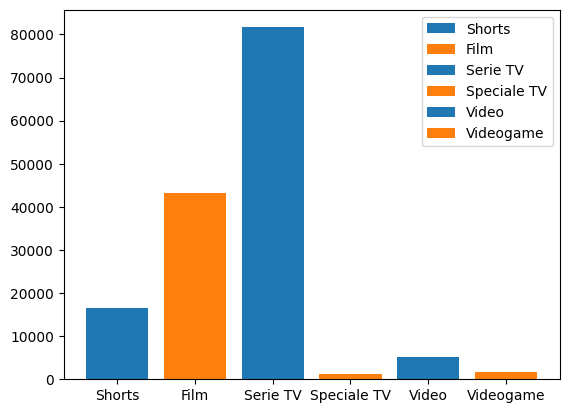

In [379]:
plt.bar(ctr.keys(), ctr.values(), label=ctr.keys(), color=['tab:blue', 'tab:orange'])
plt.legend()
plt.show()

# Undersampling

In [380]:
from sklearn.model_selection import train_test_split, cross_val_score 

In [381]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['titleType']), df['titleType'], test_size=0.3, random_state=100, stratify=df['titleType'])

In [382]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
norm = MinMaxScaler()
norm.fit(X_train)

X_train = norm.transform(X_train)
X_test = norm.transform(X_test)

In [383]:
# !pip install imblearn

In [384]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.under_sampling import CondensedNearestNeighbour
from imblearn.under_sampling import TomekLinks
from imblearn.under_sampling import EditedNearestNeighbours

### RandomUnderSampler

In [385]:
rus = RandomUnderSampler(random_state=42)
X_res, y_res = rus.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({'Film': 804, 'Serie TV': 804, 'Shorts': 804, 'Speciale TV': 804, 'Video': 804, 'Videogame': 804})


In [386]:
def plot_pca(X_pca, y_train):
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_train, cmap=plt.cm.prism, edgecolor='k', alpha=0.7)
    plt.show()

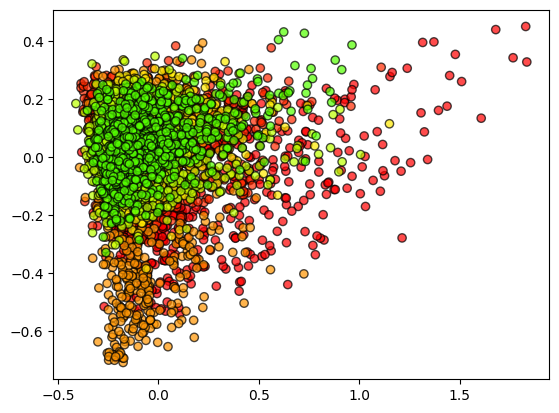

In [387]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X_train)
X_pca = pca.transform(X_res)

# Faccio il label encoding per colorare i punti del grafico, se passassi una variabile categorica alla funzione definita
# nella cella prima (plot_pca(X_pca, y_res)) il parametro c= non saprebbe come colorare i punti
label_encoder_y = LabelEncoder()
y_res_encoded = label_encoder_y.fit_transform(y_res)

plot_pca(X_pca, y_res_encoded)

In [388]:
# Faccio il decision tree (SENZA OVERSAMPLING)
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report

# fit
clf = DecisionTreeClassifier(min_samples_leaf=3, random_state=42)
clf.fit(X_train, y_train)

# predict
y_pred_og = clf.predict(X_test)

# Return probability estimates for the test data X.
y_val_pred_proba_og = clf.predict_proba(X_test)

print(classification_report(y_test, y_pred_og))

              precision    recall  f1-score   support

        Film       0.88      0.90      0.89     12947
    Serie TV       0.94      0.95      0.95     24496
      Shorts       0.87      0.85      0.86      4994
 Speciale TV       0.13      0.09      0.11       345
       Video       0.50      0.42      0.46      1545
   Videogame       0.66      0.57      0.61       533

    accuracy                           0.90     44860
   macro avg       0.66      0.63      0.64     44860
weighted avg       0.89      0.90      0.89     44860



In [389]:
# Faccio il decision tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report

# fit
clf = DecisionTreeClassifier(min_samples_leaf=3, random_state=42)
clf.fit(X_res, y_res)

# predict
y_pred = clf.predict(X_test)

# Return probability estimates for the test data X.
y_val_pred_proba = clf.predict_proba(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        Film       0.86      0.71      0.78     12947
    Serie TV       0.95      0.72      0.82     24496
      Shorts       0.73      0.78      0.75      4994
 Speciale TV       0.04      0.52      0.07       345
       Video       0.21      0.53      0.30      1545
   Videogame       0.22      0.79      0.34       533

    accuracy                           0.71     44860
   macro avg       0.50      0.67      0.51     44860
weighted avg       0.86      0.71      0.77     44860



In [390]:
# Ora, visto che le label sono più di 2, possiamo solo fare una ROC curve per ogni label vs the rest, con il metodo one-vs-the rest

from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import label_binarize

# Classi uniche nel dataset
classes = np.unique(y_test)

# Binarizza y_val
y_val_binarized = label_binarize(y_test, classes=classes)

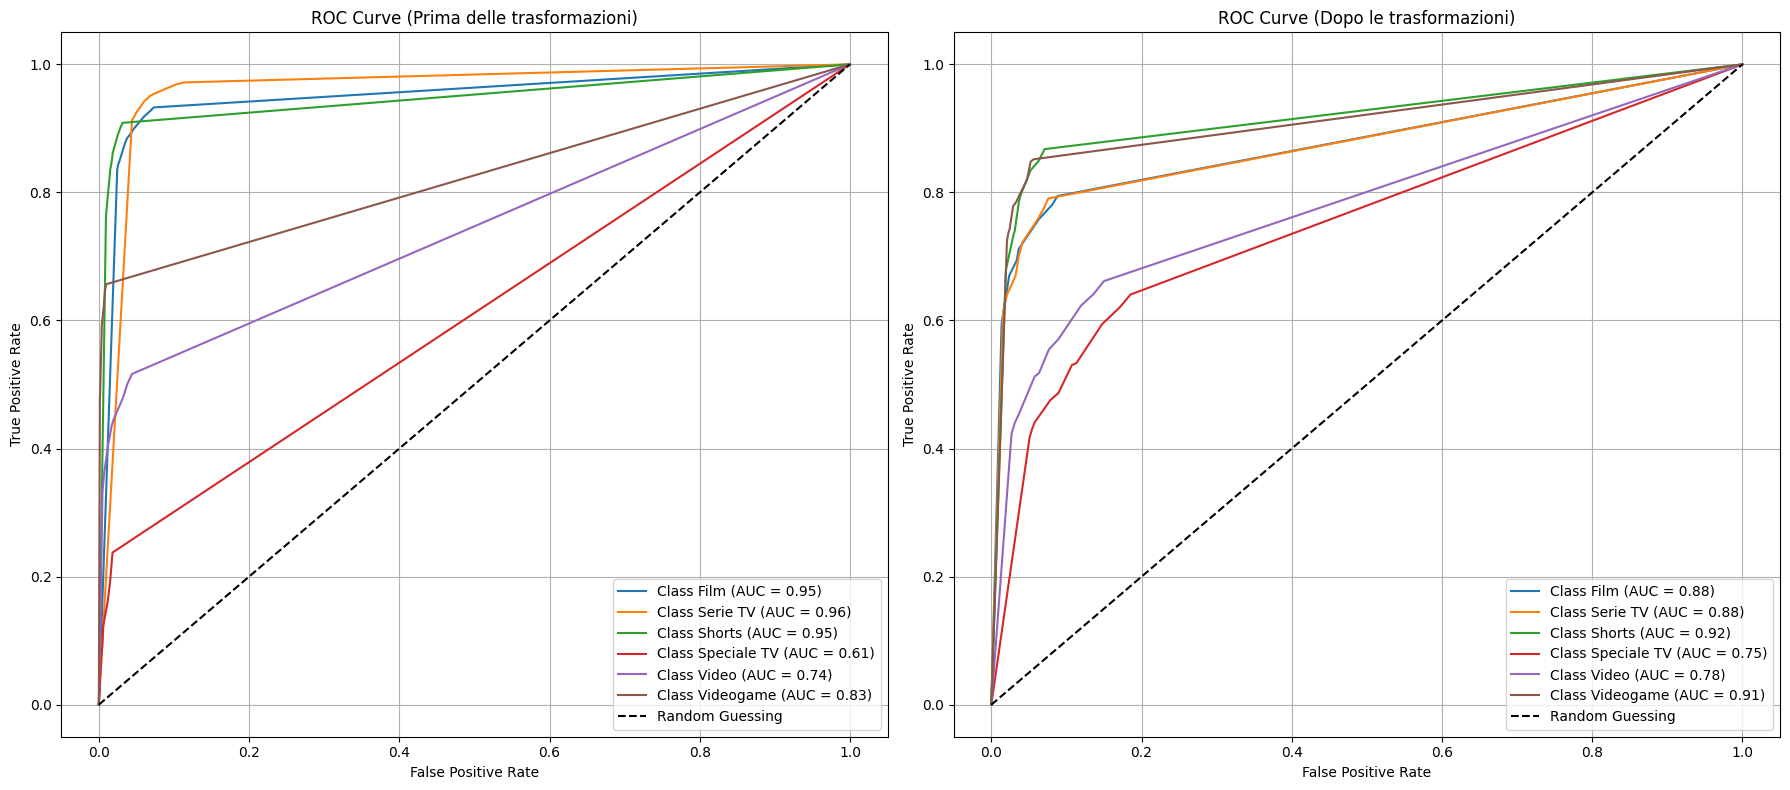

In [391]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

fig, axes = plt.subplots(1, 2, figsize=(18, 8))  # 1 riga, 2 colonne

# ---- PRIMA CURVA ROC (Dati originali) ----
for i, class_label in enumerate(classes):
    fpr, tpr, _ = roc_curve(y_val_binarized[:, i], y_val_pred_proba_og[:, i])
    auc = roc_auc_score(y_val_binarized[:, i], y_val_pred_proba_og[:, i])
    axes[0].plot(fpr, tpr, label=f"Class {class_label} (AUC = {auc:.2f})")

axes[0].plot([0, 1], [0, 1], 'k--', label="Random Guessing")  # Linea casuale
axes[0].set_xlabel("False Positive Rate")
axes[0].set_ylabel("True Positive Rate")
axes[0].set_title("ROC Curve (Prima delle trasformazioni)")
axes[0].legend(loc="best")
axes[0].grid()

# ---- SECONDA CURVA ROC (Dopo Oversampling) ----
for i, class_label in enumerate(classes):
    fpr, tpr, _ = roc_curve(y_val_binarized[:, i], y_val_pred_proba[:, i])
    auc = roc_auc_score(y_val_binarized[:, i], y_val_pred_proba[:, i])
    axes[1].plot(fpr, tpr, label=f"Class {class_label} (AUC = {auc:.2f})")

axes[1].plot([0, 1], [0, 1], 'k--', label="Random Guessing")  # Linea casuale
axes[1].set_xlabel("False Positive Rate")
axes[1].set_ylabel("True Positive Rate")
axes[1].set_title("ROC Curve (Dopo le trasformazioni)")
axes[1].legend(loc="best")
axes[1].grid()

# Mostra entrambe le curve ROC
plt.tight_layout()
plt.show()


### Tomek Links

In [394]:
tl = TomekLinks()
X_res, y_res = tl.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({'Serie TV': 55178, 'Film': 27610, 'Shorts': 9842, 'Video': 2767, 'Videogame': 1028, 'Speciale TV': 804})


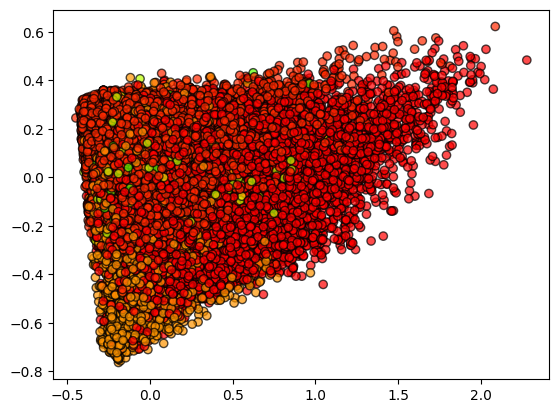

In [395]:
pca = PCA(n_components=2)
pca.fit(X_train)
X_pca = pca.transform(X_res)

# Faccio il label encoding per colorare i punti del grafico, se passassi una variabile categorica alla funzione definita
# nella cella prima (plot_pca(X_pca, y_res)) il parametro c= non saprebbe come colorare i punti
label_encoder_y = LabelEncoder()
y_res_encoded = label_encoder_y.fit_transform(y_res)

plot_pca(X_pca, y_res_encoded)

In [396]:
# Faccio il decision tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report

# fit
clf = DecisionTreeClassifier(min_samples_leaf=3, random_state=42)
clf.fit(X_res, y_res)

# predict
y_pred = clf.predict(X_test)

# Return probability estimates for the test data X.
y_val_pred_proba = clf.predict_proba(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        Film       0.89      0.90      0.89     12947
    Serie TV       0.94      0.96      0.95     24496
      Shorts       0.87      0.85      0.86      4994
 Speciale TV       0.15      0.11      0.13       345
       Video       0.54      0.40      0.46      1545
   Videogame       0.63      0.55      0.59       533

    accuracy                           0.90     44860
   macro avg       0.67      0.63      0.64     44860
weighted avg       0.89      0.90      0.89     44860



In [397]:
# Ora, visto che le label sono più di 2, possiamo solo fare una ROC curve per ogni label vs the rest, con il metodo one-vs-the rest

from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import label_binarize

# Classi uniche nel dataset
classes = np.unique(y_test)

# Binarizza y_val
y_val_binarized = label_binarize(y_test, classes=classes)

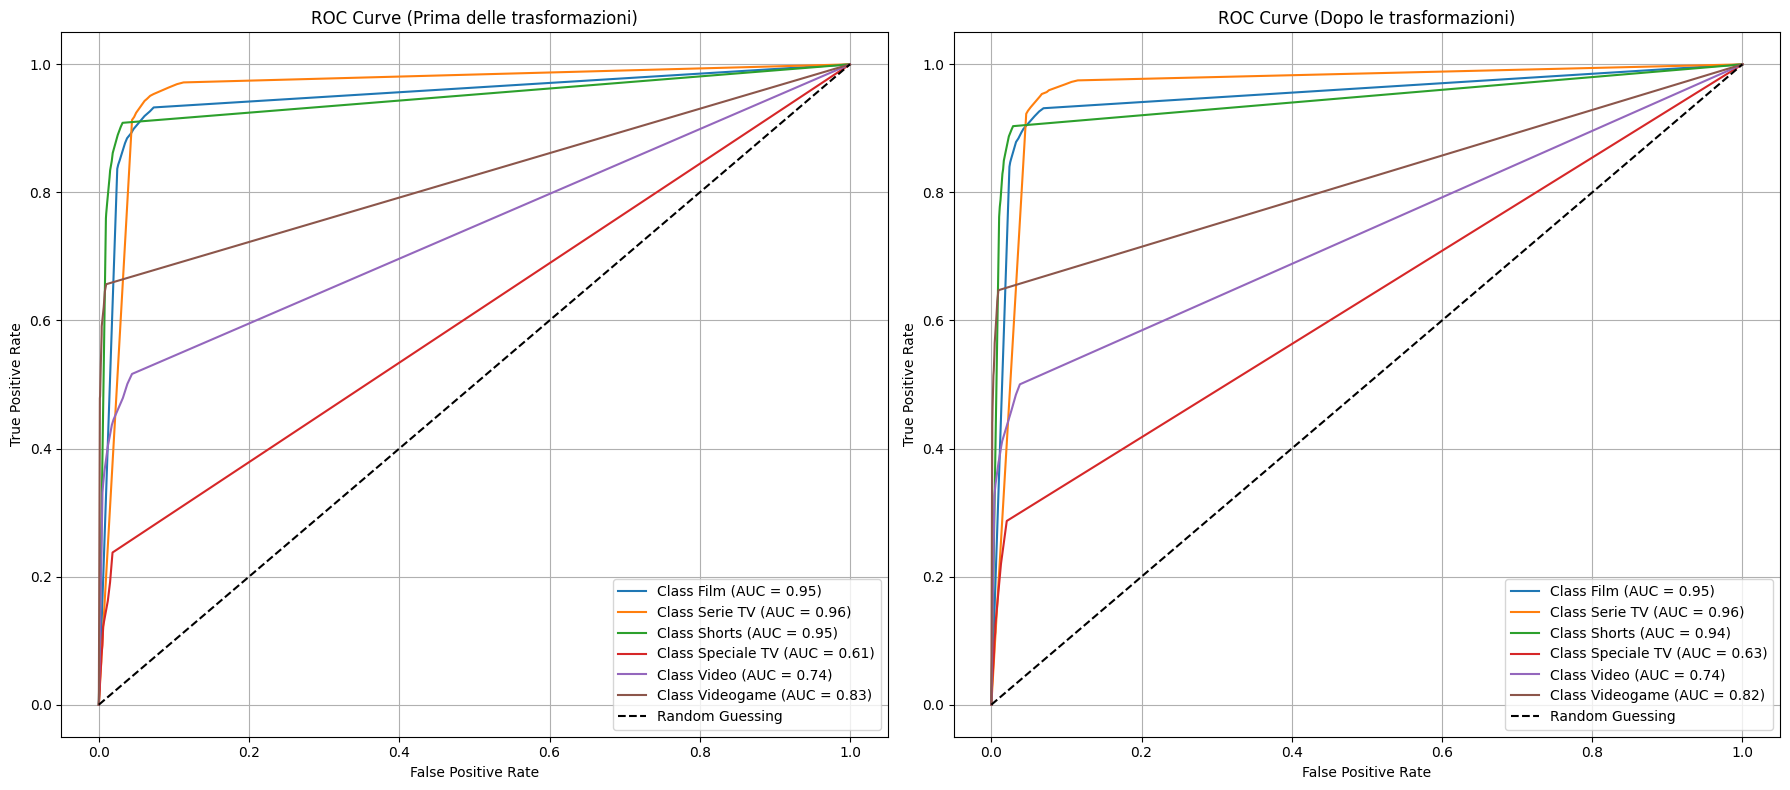

In [398]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

fig, axes = plt.subplots(1, 2, figsize=(18, 8))  # 1 riga, 2 colonne

# ---- PRIMA CURVA ROC (Dati originali) ----
for i, class_label in enumerate(classes):
    fpr, tpr, _ = roc_curve(y_val_binarized[:, i], y_val_pred_proba_og[:, i])
    auc = roc_auc_score(y_val_binarized[:, i], y_val_pred_proba_og[:, i])
    axes[0].plot(fpr, tpr, label=f"Class {class_label} (AUC = {auc:.2f})")

axes[0].plot([0, 1], [0, 1], 'k--', label="Random Guessing")  # Linea casuale
axes[0].set_xlabel("False Positive Rate")
axes[0].set_ylabel("True Positive Rate")
axes[0].set_title("ROC Curve (Prima delle trasformazioni)")
axes[0].legend(loc="best")
axes[0].grid()

# ---- SECONDA CURVA ROC (Dopo Oversampling) ----
for i, class_label in enumerate(classes):
    fpr, tpr, _ = roc_curve(y_val_binarized[:, i], y_val_pred_proba[:, i])
    auc = roc_auc_score(y_val_binarized[:, i], y_val_pred_proba[:, i])
    axes[1].plot(fpr, tpr, label=f"Class {class_label} (AUC = {auc:.2f})")

axes[1].plot([0, 1], [0, 1], 'k--', label="Random Guessing")  # Linea casuale
axes[1].set_xlabel("False Positive Rate")
axes[1].set_ylabel("True Positive Rate")
axes[1].set_title("ROC Curve (Dopo le trasformazioni)")
axes[1].legend(loc="best")
axes[1].grid()

# Mostra entrambe le curve ROC
plt.tight_layout()
plt.show()

### Edited Nearest Neighbors

In [399]:
enn = EditedNearestNeighbours()
X_res, y_res = enn.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({'Serie TV': 46377, 'Film': 17107, 'Shorts': 4062, 'Video': 900, 'Speciale TV': 804, 'Videogame': 282})


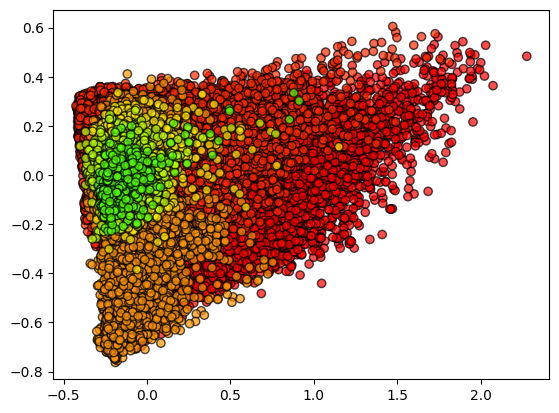

In [400]:
pca = PCA(n_components=2)
pca.fit(X_train)
X_pca = pca.transform(X_res)

# Faccio il label encoding per colorare i punti del grafico, se passassi una variabile categorica alla funzione definita
# nella cella prima (plot_pca(X_pca, y_res)) il parametro c= non saprebbe come colorare i punti
label_encoder_y = LabelEncoder()
y_res_encoded = label_encoder_y.fit_transform(y_res)

plot_pca(X_pca, y_res_encoded)

In [401]:
# Faccio il decision tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report

# fit
clf = DecisionTreeClassifier(min_samples_leaf=3, random_state=42)
clf.fit(X_res, y_res)

# predict
y_pred = clf.predict(X_test)

# Return probability estimates for the test data X.
y_val_pred_proba = clf.predict_proba(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        Film       0.91      0.86      0.88     12947
    Serie TV       0.90      0.97      0.93     24496
      Shorts       0.87      0.75      0.80      4994
 Speciale TV       0.08      0.23      0.12       345
       Video       0.83      0.33      0.47      1545
   Videogame       0.75      0.34      0.47       533

    accuracy                           0.88     44860
   macro avg       0.72      0.58      0.61     44860
weighted avg       0.89      0.88      0.88     44860



In [402]:
# Ora, visto che le label sono più di 2, possiamo solo fare una ROC curve per ogni label vs the rest, con il metodo one-vs-the rest

from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import label_binarize

# Classi uniche nel dataset
classes = np.unique(y_test)

# Binarizza y_val
y_val_binarized = label_binarize(y_test, classes=classes)

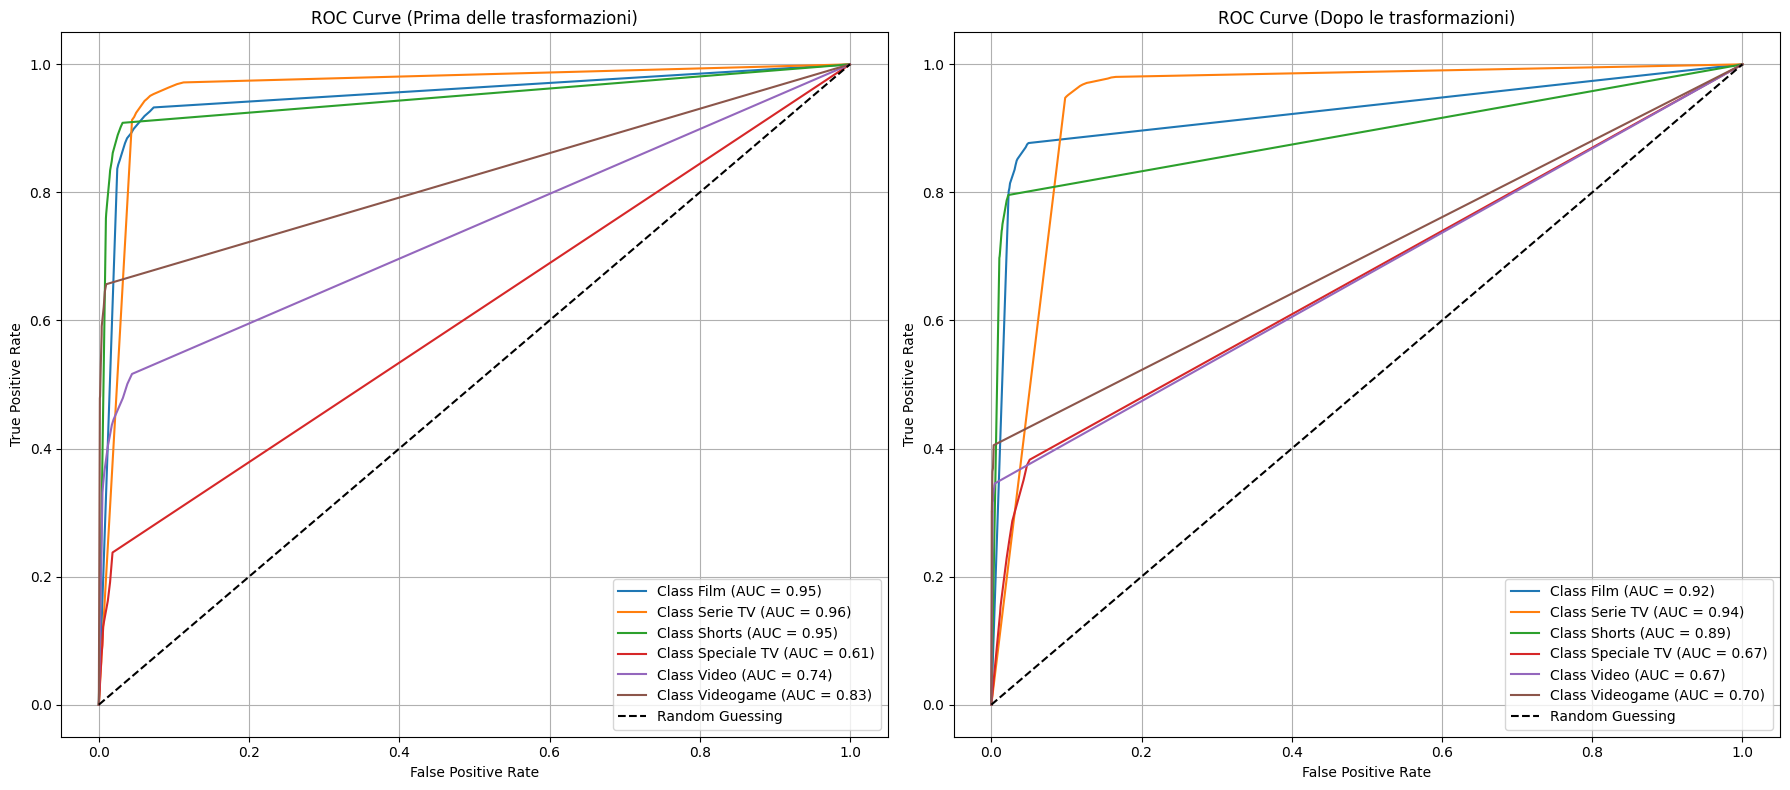

In [403]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

fig, axes = plt.subplots(1, 2, figsize=(18, 8))  # 1 riga, 2 colonne

# ---- PRIMA CURVA ROC (Dati originali) ----
for i, class_label in enumerate(classes):
    fpr, tpr, _ = roc_curve(y_val_binarized[:, i], y_val_pred_proba_og[:, i])
    auc = roc_auc_score(y_val_binarized[:, i], y_val_pred_proba_og[:, i])
    axes[0].plot(fpr, tpr, label=f"Class {class_label} (AUC = {auc:.2f})")

axes[0].plot([0, 1], [0, 1], 'k--', label="Random Guessing")  # Linea casuale
axes[0].set_xlabel("False Positive Rate")
axes[0].set_ylabel("True Positive Rate")
axes[0].set_title("ROC Curve (Prima delle trasformazioni)")
axes[0].legend(loc="best")
axes[0].grid()

# ---- SECONDA CURVA ROC (Dopo Oversampling) ----
for i, class_label in enumerate(classes):
    fpr, tpr, _ = roc_curve(y_val_binarized[:, i], y_val_pred_proba[:, i])
    auc = roc_auc_score(y_val_binarized[:, i], y_val_pred_proba[:, i])
    axes[1].plot(fpr, tpr, label=f"Class {class_label} (AUC = {auc:.2f})")

axes[1].plot([0, 1], [0, 1], 'k--', label="Random Guessing")  # Linea casuale
axes[1].set_xlabel("False Positive Rate")
axes[1].set_ylabel("True Positive Rate")
axes[1].set_title("ROC Curve (Dopo le trasformazioni)")
axes[1].legend(loc="best")
axes[1].grid()

# Mostra entrambe le curve ROC
plt.tight_layout()
plt.show()

### Cluster Centroids

In [404]:
from sklearn.cluster import MiniBatchKMeans
from imblearn.under_sampling import ClusterCentroids

In [405]:
cc = ClusterCentroids(
    estimator=MiniBatchKMeans(n_init=1, random_state=0), random_state=42
)
X_res, y_res = cc.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({'Film': 804, 'Serie TV': 804, 'Shorts': 804, 'Speciale TV': 804, 'Video': 804, 'Videogame': 804})


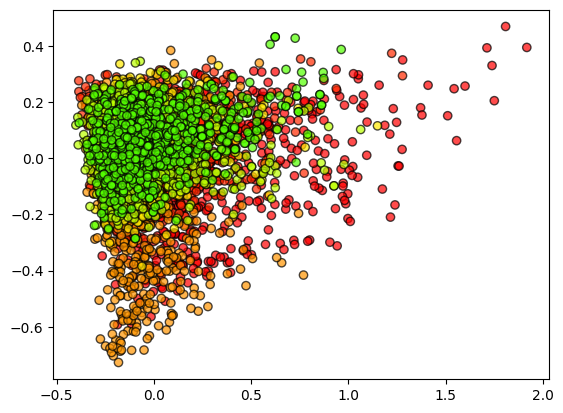

In [406]:
pca = PCA(n_components=2)
pca.fit(X_train)
X_pca = pca.transform(X_res)

# Faccio il label encoding per colorare i punti del grafico, se passassi una variabile categorica alla funzione definita
# nella cella prima (plot_pca(X_pca, y_res)) il parametro c= non saprebbe come colorare i punti
label_encoder_y = LabelEncoder()
y_res_encoded = label_encoder_y.fit_transform(y_res)

plot_pca(X_pca, y_res_encoded)

In [407]:
# Faccio il decision tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report

# fit
clf = DecisionTreeClassifier(min_samples_leaf=3, random_state=42)
clf.fit(X_res, y_res)

# predict
y_pred = clf.predict(X_test)

# Return probability estimates for the test data X.
y_val_pred_proba = clf.predict_proba(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        Film       0.91      0.27      0.41     12947
    Serie TV       0.86      0.23      0.36     24496
      Shorts       0.68      0.42      0.52      4994
 Speciale TV       0.02      0.83      0.03       345
       Video       0.10      0.58      0.17      1545
   Videogame       0.12      0.86      0.21       533

    accuracy                           0.28     44860
   macro avg       0.45      0.53      0.28     44860
weighted avg       0.82      0.28      0.38     44860



In [408]:
# Ora, visto che le label sono più di 2, possiamo solo fare una ROC curve per ogni label vs the rest, con il metodo one-vs-the rest

from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import label_binarize

# Classi uniche nel dataset
classes = np.unique(y_test)

# Binarizza y_val
y_val_binarized = label_binarize(y_test, classes=classes)

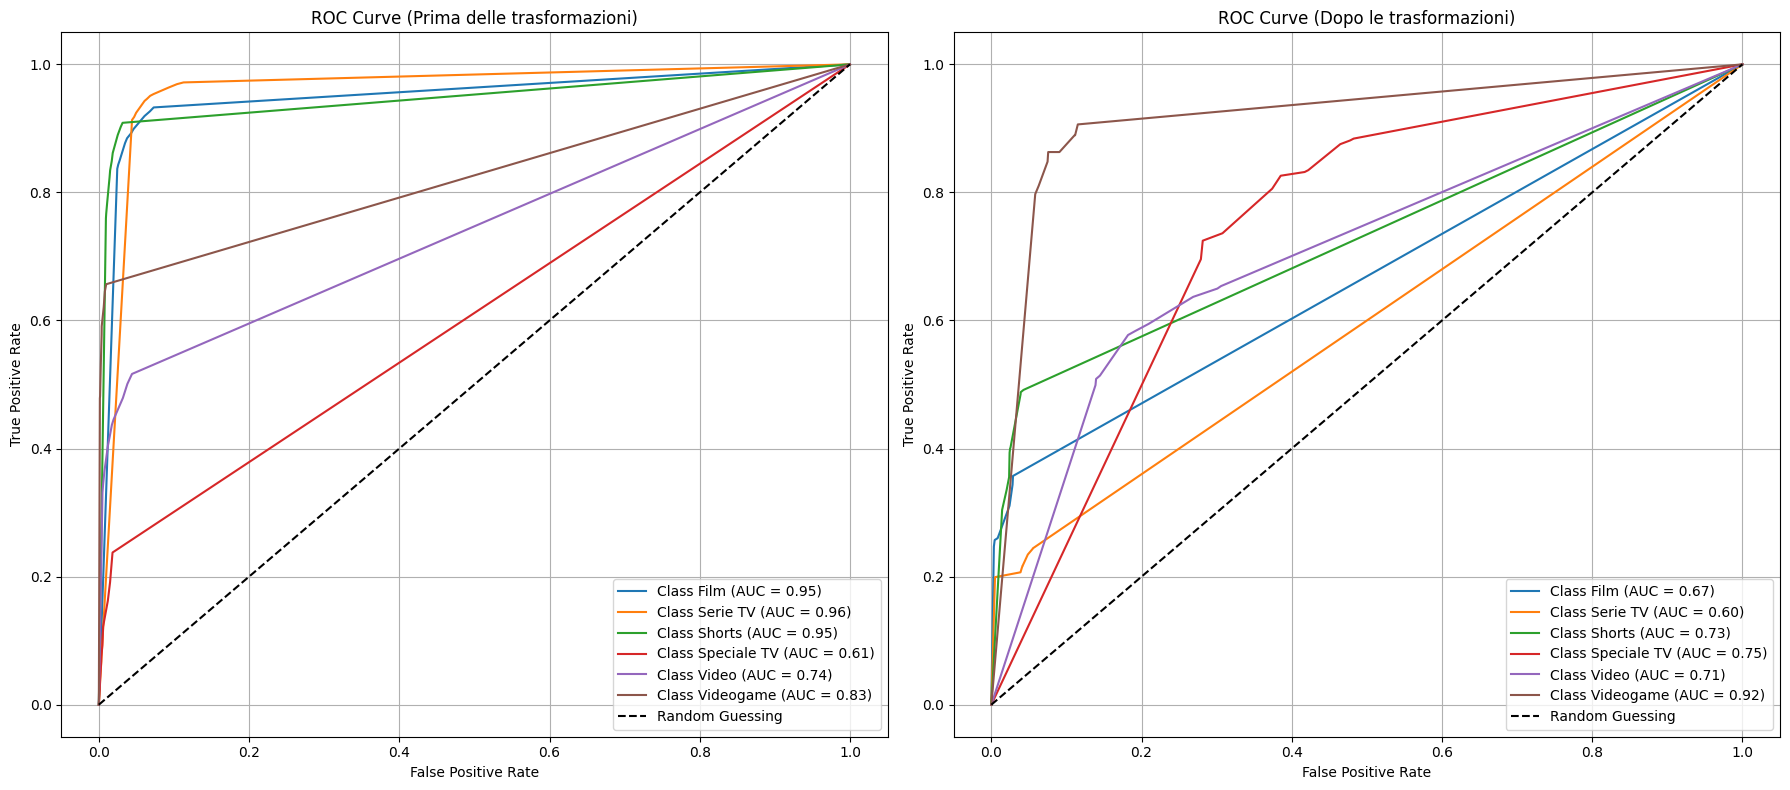

In [409]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

fig, axes = plt.subplots(1, 2, figsize=(18, 8))  # 1 riga, 2 colonne

# ---- PRIMA CURVA ROC (Dati originali) ----
for i, class_label in enumerate(classes):
    fpr, tpr, _ = roc_curve(y_val_binarized[:, i], y_val_pred_proba_og[:, i])
    auc = roc_auc_score(y_val_binarized[:, i], y_val_pred_proba_og[:, i])
    axes[0].plot(fpr, tpr, label=f"Class {class_label} (AUC = {auc:.2f})")

axes[0].plot([0, 1], [0, 1], 'k--', label="Random Guessing")  # Linea casuale
axes[0].set_xlabel("False Positive Rate")
axes[0].set_ylabel("True Positive Rate")
axes[0].set_title("ROC Curve (Prima delle trasformazioni)")
axes[0].legend(loc="best")
axes[0].grid()

# ---- SECONDA CURVA ROC (Dopo Oversampling) ----
for i, class_label in enumerate(classes):
    fpr, tpr, _ = roc_curve(y_val_binarized[:, i], y_val_pred_proba[:, i])
    auc = roc_auc_score(y_val_binarized[:, i], y_val_pred_proba[:, i])
    axes[1].plot(fpr, tpr, label=f"Class {class_label} (AUC = {auc:.2f})")

axes[1].plot([0, 1], [0, 1], 'k--', label="Random Guessing")  # Linea casuale
axes[1].set_xlabel("False Positive Rate")
axes[1].set_ylabel("True Positive Rate")
axes[1].set_title("ROC Curve (Dopo le trasformazioni)")
axes[1].legend(loc="best")
axes[1].grid()

# Mostra entrambe le curve ROC
plt.tight_layout()
plt.show()

# Oversampling

In [410]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN

### RandomOverSampler

In [411]:
ros = RandomOverSampler(random_state=42)
X_res, y_res = ros.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({'Serie TV': 57158, 'Film': 57158, 'Shorts': 57158, 'Video': 57158, 'Videogame': 57158, 'Speciale TV': 57158})


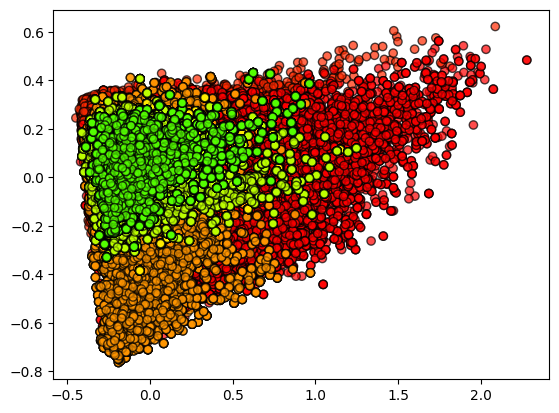

In [412]:
pca = PCA(n_components=2)
pca.fit(X_train)
X_pca = pca.transform(X_res)

# Faccio il label encoding per colorare i punti del grafico, se passassi una variabile categorica alla funzione definita
# nella cella prima (plot_pca(X_pca, y_res)) il parametro c= non saprebbe come colorare i punti
label_encoder_y = LabelEncoder()
y_res_encoded = label_encoder_y.fit_transform(y_res)

plot_pca(X_pca, y_res_encoded)

In [413]:
# Faccio il decision tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report

# fit
clf = DecisionTreeClassifier(min_samples_leaf=3, random_state=42)
clf.fit(X_res, y_res)

# predict
y_pred = clf.predict(X_test)

# Return probability estimates for the test data X.
y_val_pred_proba = clf.predict_proba(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        Film       0.88      0.88      0.88     12947
    Serie TV       0.95      0.93      0.94     24496
      Shorts       0.83      0.85      0.84      4994
 Speciale TV       0.15      0.17      0.16       345
       Video       0.39      0.47      0.43      1545
   Videogame       0.59      0.63      0.61       533

    accuracy                           0.88     44860
   macro avg       0.63      0.65      0.64     44860
weighted avg       0.88      0.88      0.88     44860



In [414]:
# Ora, visto che le label sono più di 2, possiamo solo fare una ROC curve per ogni label vs the rest, con il metodo one-vs-the rest

from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import label_binarize

# Classi uniche nel dataset
classes = np.unique(y_test)

# Binarizza y_val
y_val_binarized = label_binarize(y_test, classes=classes)

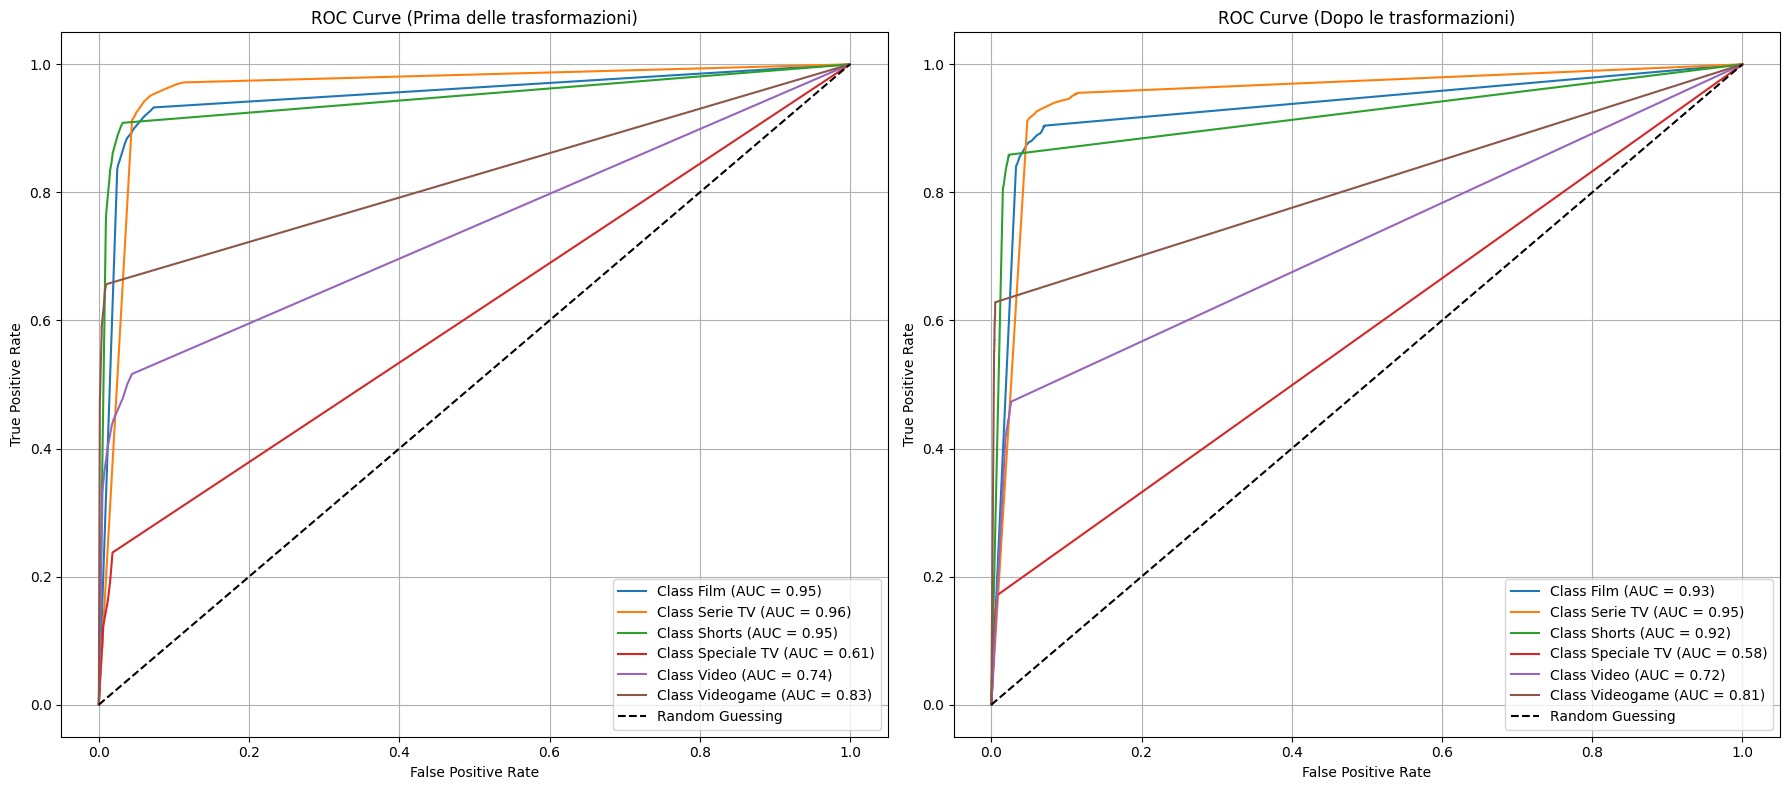

In [415]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

fig, axes = plt.subplots(1, 2, figsize=(18, 8))  # 1 riga, 2 colonne

# ---- PRIMA CURVA ROC (Dati originali) ----
for i, class_label in enumerate(classes):
    fpr, tpr, _ = roc_curve(y_val_binarized[:, i], y_val_pred_proba_og[:, i])
    auc = roc_auc_score(y_val_binarized[:, i], y_val_pred_proba_og[:, i])
    axes[0].plot(fpr, tpr, label=f"Class {class_label} (AUC = {auc:.2f})")

axes[0].plot([0, 1], [0, 1], 'k--', label="Random Guessing")  # Linea casuale
axes[0].set_xlabel("False Positive Rate")
axes[0].set_ylabel("True Positive Rate")
axes[0].set_title("ROC Curve (Prima delle trasformazioni)")
axes[0].legend(loc="best")
axes[0].grid()

# ---- SECONDA CURVA ROC (Dopo Oversampling) ----
for i, class_label in enumerate(classes):
    fpr, tpr, _ = roc_curve(y_val_binarized[:, i], y_val_pred_proba[:, i])
    auc = roc_auc_score(y_val_binarized[:, i], y_val_pred_proba[:, i])
    axes[1].plot(fpr, tpr, label=f"Class {class_label} (AUC = {auc:.2f})")

axes[1].plot([0, 1], [0, 1], 'k--', label="Random Guessing")  # Linea casuale
axes[1].set_xlabel("False Positive Rate")
axes[1].set_ylabel("True Positive Rate")
axes[1].set_title("ROC Curve (Dopo le trasformazioni)")
axes[1].legend(loc="best")
axes[1].grid()

# Mostra entrambe le curve ROC
plt.tight_layout()
plt.show()

### SMOTE

In [416]:
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({'Serie TV': 57158, 'Film': 57158, 'Shorts': 57158, 'Video': 57158, 'Videogame': 57158, 'Speciale TV': 57158})


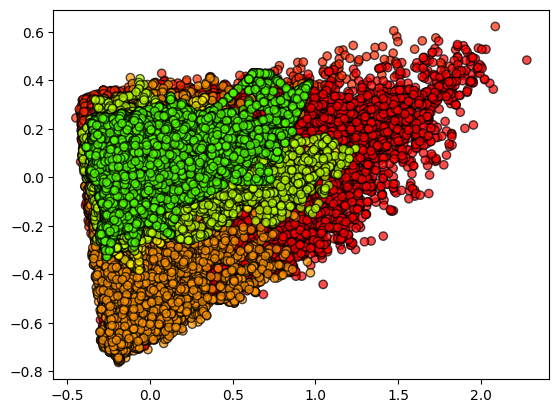

In [417]:
pca = PCA(n_components=2)
pca.fit(X_train)
X_pca = pca.transform(X_res)

# Faccio il label encoding per colorare i punti del grafico, se passassi una variabile categorica alla funzione definita
# nella cella prima (plot_pca(X_pca, y_res)) il parametro c= non saprebbe come colorare i punti
label_encoder_y = LabelEncoder()
y_res_encoded = label_encoder_y.fit_transform(y_res)

plot_pca(X_pca, y_res_encoded)

In [418]:
# Faccio il decision tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report

# fit
clf = DecisionTreeClassifier(min_samples_leaf=3, random_state=42)
clf.fit(X_res, y_res)

# predict
y_pred = clf.predict(X_test)

# Return probability estimates for the test data X.
y_val_pred_proba = clf.predict_proba(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        Film       0.88      0.87      0.87     12947
    Serie TV       0.95      0.92      0.94     24496
      Shorts       0.86      0.80      0.83      4994
 Speciale TV       0.11      0.27      0.16       345
       Video       0.38      0.52      0.44      1545
   Videogame       0.51      0.65      0.57       533

    accuracy                           0.87     44860
   macro avg       0.61      0.67      0.63     44860
weighted avg       0.89      0.87      0.88     44860



In [419]:
# Ora, visto che le label sono più di 2, possiamo solo fare una ROC curve per ogni label vs the rest, con il metodo one-vs-the rest

from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import label_binarize

# Classi uniche nel dataset
classes = np.unique(y_test)

# Binarizza y_val
y_val_binarized = label_binarize(y_test, classes=classes)

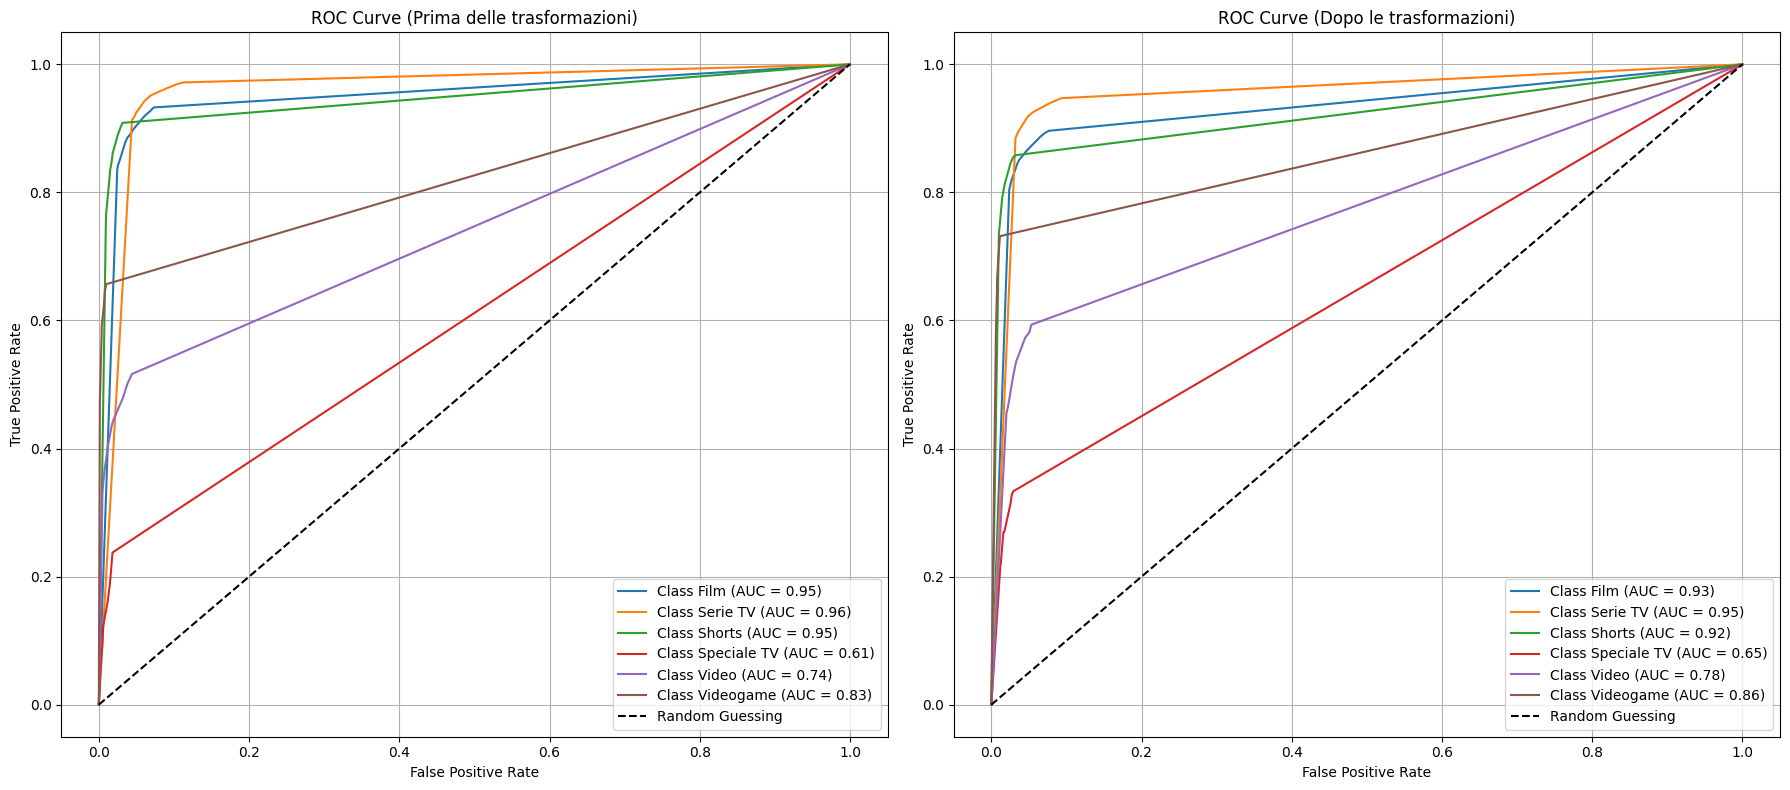

In [420]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

fig, axes = plt.subplots(1, 2, figsize=(18, 8))  # 1 riga, 2 colonne

# ---- PRIMA CURVA ROC (Dati originali) ----
for i, class_label in enumerate(classes):
    fpr, tpr, _ = roc_curve(y_val_binarized[:, i], y_val_pred_proba_og[:, i])
    auc = roc_auc_score(y_val_binarized[:, i], y_val_pred_proba_og[:, i])
    axes[0].plot(fpr, tpr, label=f"Class {class_label} (AUC = {auc:.2f})")

axes[0].plot([0, 1], [0, 1], 'k--', label="Random Guessing")  # Linea casuale
axes[0].set_xlabel("False Positive Rate")
axes[0].set_ylabel("True Positive Rate")
axes[0].set_title("ROC Curve (Prima delle trasformazioni)")
axes[0].legend(loc="best")
axes[0].grid()

# ---- SECONDA CURVA ROC (Dopo Oversampling) ----
for i, class_label in enumerate(classes):
    fpr, tpr, _ = roc_curve(y_val_binarized[:, i], y_val_pred_proba[:, i])
    auc = roc_auc_score(y_val_binarized[:, i], y_val_pred_proba[:, i])
    axes[1].plot(fpr, tpr, label=f"Class {class_label} (AUC = {auc:.2f})")

axes[1].plot([0, 1], [0, 1], 'k--', label="Random Guessing")  # Linea casuale
axes[1].set_xlabel("False Positive Rate")
axes[1].set_ylabel("True Positive Rate")
axes[1].set_title("ROC Curve (Dopo le trasformazioni)")
axes[1].legend(loc="best")
axes[1].grid()

# Mostra entrambe le curve ROC
plt.tight_layout()
plt.show()

### ADASYN

In [421]:
ada = ADASYN(random_state=42)
X_res, y_res = ada.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({'Film': 57822, 'Videogame': 57328, 'Video': 57282, 'Serie TV': 57158, 'Speciale TV': 57100, 'Shorts': 56516})


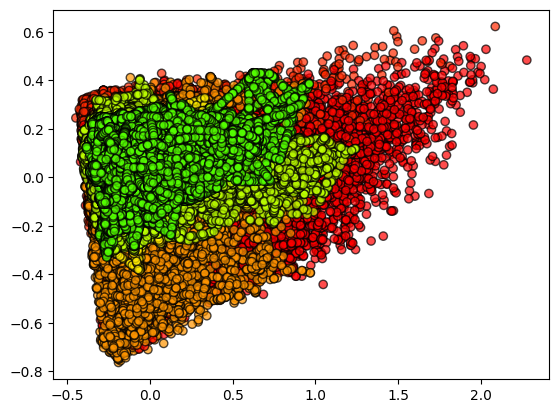

In [422]:
pca = PCA(n_components=2)
pca.fit(X_train)
X_pca = pca.transform(X_res)

# Faccio il label encoding per colorare i punti del grafico, se passassi una variabile categorica alla funzione definita
# nella cella prima (plot_pca(X_pca, y_res)) il parametro c= non saprebbe come colorare i punti
label_encoder_y = LabelEncoder()
y_res_encoded = label_encoder_y.fit_transform(y_res)

plot_pca(X_pca, y_res_encoded)

In [423]:
# Faccio il decision tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report

# fit
clf = DecisionTreeClassifier(min_samples_leaf=3, random_state=42)
clf.fit(X_res, y_res)

# predict
y_pred = clf.predict(X_test)

# Return probability estimates for the test data X.
y_val_pred_proba = clf.predict_proba(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        Film       0.86      0.87      0.86     12947
    Serie TV       0.96      0.92      0.94     24496
      Shorts       0.86      0.80      0.83      4994
 Speciale TV       0.11      0.27      0.16       345
       Video       0.36      0.50      0.42      1545
   Videogame       0.49      0.67      0.57       533

    accuracy                           0.87     44860
   macro avg       0.61      0.67      0.63     44860
weighted avg       0.89      0.87      0.88     44860



In [424]:
# Ora, visto che le label sono più di 2, possiamo solo fare una ROC curve per ogni label vs the rest, con il metodo one-vs-the rest

from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import label_binarize

# Classi uniche nel dataset
classes = np.unique(y_test)

# Binarizza y_val
y_val_binarized = label_binarize(y_test, classes=classes)

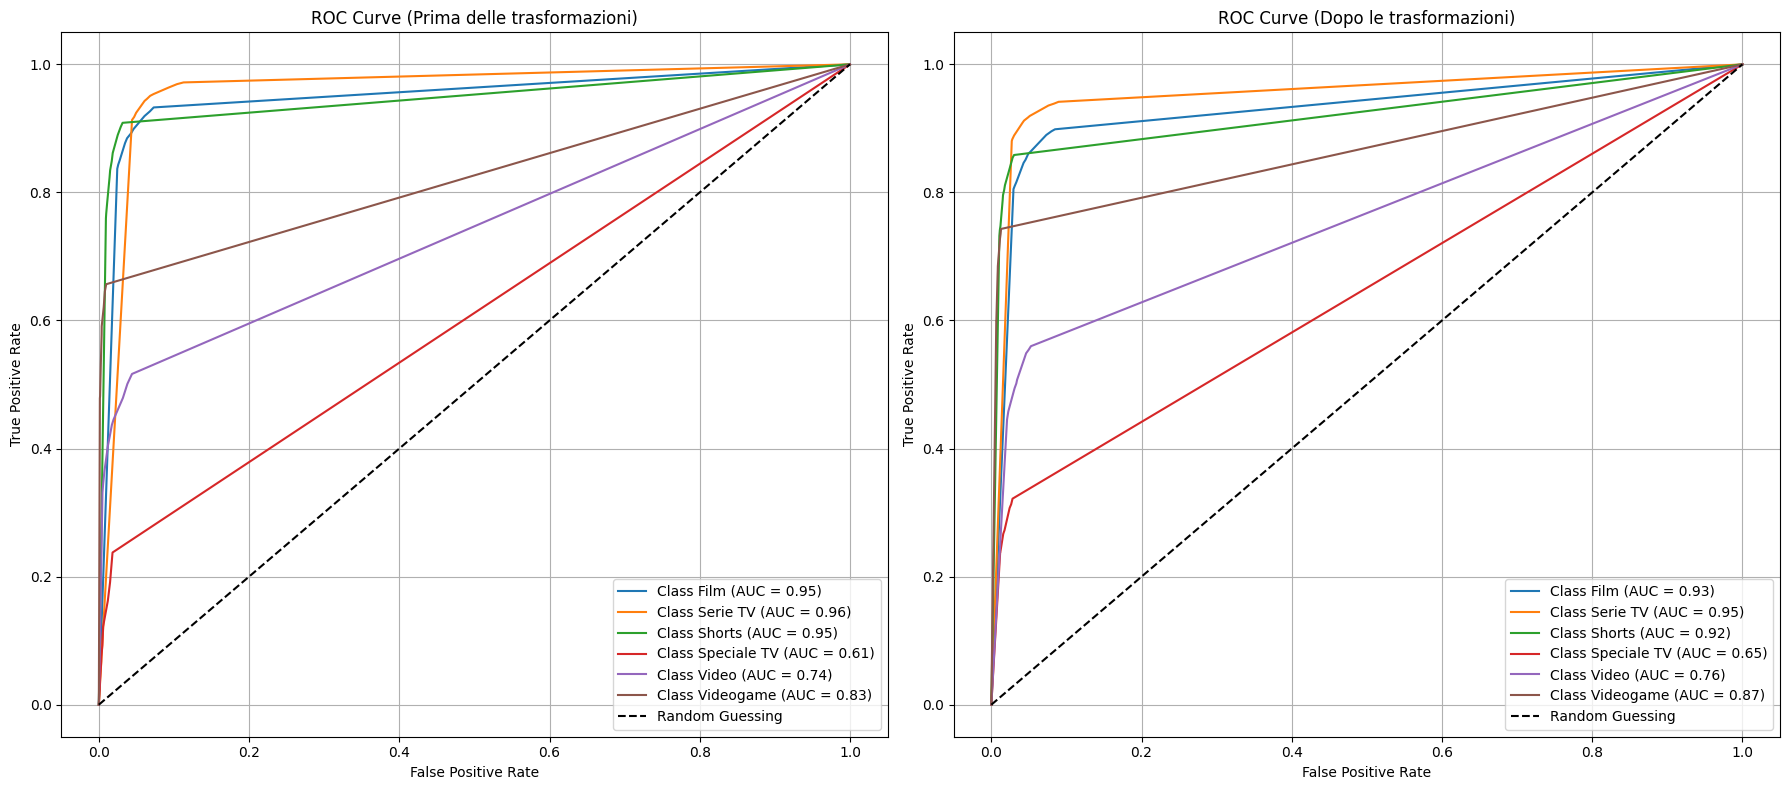

In [425]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

fig, axes = plt.subplots(1, 2, figsize=(18, 8))  # 1 riga, 2 colonne

# ---- PRIMA CURVA ROC (Dati originali) ----
for i, class_label in enumerate(classes):
    fpr, tpr, _ = roc_curve(y_val_binarized[:, i], y_val_pred_proba_og[:, i])
    auc = roc_auc_score(y_val_binarized[:, i], y_val_pred_proba_og[:, i])
    axes[0].plot(fpr, tpr, label=f"Class {class_label} (AUC = {auc:.2f})")

axes[0].plot([0, 1], [0, 1], 'k--', label="Random Guessing")  # Linea casuale
axes[0].set_xlabel("False Positive Rate")
axes[0].set_ylabel("True Positive Rate")
axes[0].set_title("ROC Curve (Prima delle trasformazioni)")
axes[0].legend(loc="best")
axes[0].grid()

# ---- SECONDA CURVA ROC (Dopo Oversampling) ----
for i, class_label in enumerate(classes):
    fpr, tpr, _ = roc_curve(y_val_binarized[:, i], y_val_pred_proba[:, i])
    auc = roc_auc_score(y_val_binarized[:, i], y_val_pred_proba[:, i])
    axes[1].plot(fpr, tpr, label=f"Class {class_label} (AUC = {auc:.2f})")

axes[1].plot([0, 1], [0, 1], 'k--', label="Random Guessing")  # Linea casuale
axes[1].set_xlabel("False Positive Rate")
axes[1].set_ylabel("True Positive Rate")
axes[1].set_title("ROC Curve (Dopo le trasformazioni)")
axes[1].legend(loc="best")
axes[1].grid()

# Mostra entrambe le curve ROC
plt.tight_layout()
plt.show()